In [23]:
import io
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
# pip install scikit-image

In [24]:
image_pixels = io.imread("sobel/vscode.png")
image_pixels.shape

(600, 800, 4)

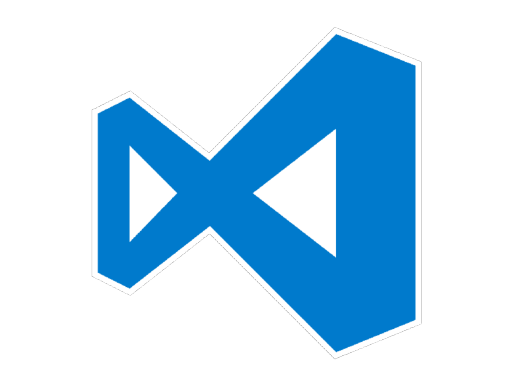

In [25]:
plt.imshow(image_pixels, cmap="gray")
plt.axis("off")
plt.show()

In [26]:
if image_pixels.shape[-1] == 4:
    image_pixels = image_pixels[..., :3]  # discard alpha

In [27]:
gray_img = color.rgb2gray(image_pixels)
gray_img[30:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(570, 800))

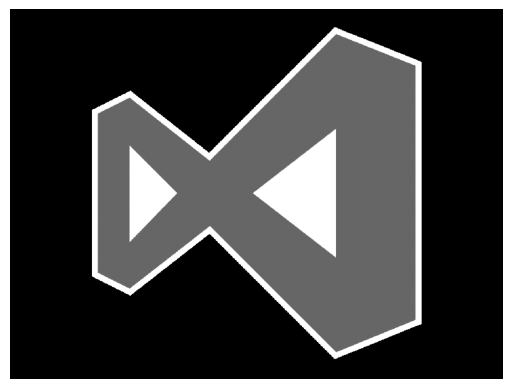

In [28]:
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()

In [29]:
edge_sobel = filters.sobel(gray_img)
edge_sobel.shape

(600, 800)

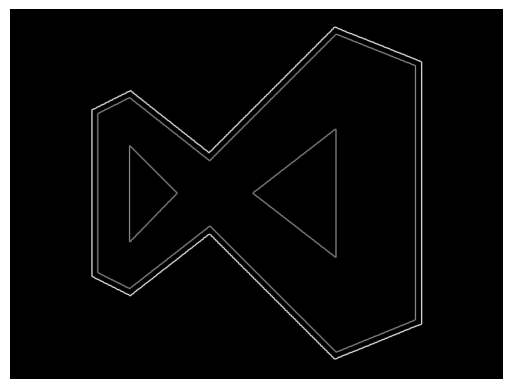

In [30]:
from skimage.util import img_as_ubyte

io.imsave("sobel/edge_sobel.png", img_as_ubyte(edge_sobel))

plt.imshow(edge_sobel, cmap="gray")
plt.axis("off")
plt.show()

In [31]:
threshold = 0.2
edges = edge_sobel > threshold
edges[100:110,550:570]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [Fa

In [32]:
edge_pixel_indices = np.nonzero(edges)
edge_pixel_indices

(array([ 28,  28,  28, ..., 568, 568, 568], shape=(11065,)),
 array([526, 527, 528, ..., 526, 527, 528], shape=(11065,)))

In [33]:
edges[104,572]

np.False_

In [34]:
edge_points = np.column_stack(np.nonzero(edges))
edge_points[:3]

array([[ 28, 526],
       [ 28, 527],
       [ 28, 528]])

In [35]:
contours = measure.find_contours(edges, level=0.5)
contours

[array([[568.5, 528. ],
        [568.5, 527. ],
        [568.5, 526. ],
        ...,
        [567.5, 529. ],
        [568. , 528.5],
        [568.5, 528. ]], shape=(2555, 2)),
 array([[565. , 529.5],
        [564.5, 530. ],
        [564. , 530.5],
        ...,
        [565.5, 528. ],
        [565.5, 529. ],
        [565. , 529.5]], shape=(2535, 2)),
 array([[556.5, 531. ],
        [556.5, 530. ],
        [556.5, 529. ],
        ...,
        [555.5, 532. ],
        [556. , 531.5],
        [556.5, 531. ]], shape=(2477, 2)),
 array([[554. , 530.5],
        [553.5, 531. ],
        [553.5, 532. ],
        ...,
        [554.5, 529. ],
        [554.5, 530. ],
        [554. , 530.5]], shape=(2459, 2)),
 array([[403.5, 528. ],
        [403. , 527.5],
        [402.5, 527. ],
        ...,
        [402.5, 529. ],
        [403. , 528.5],
        [403.5, 528. ]], shape=(693, 2)),
 array([[400. , 527.5],
        [399. , 527.5],
        [398. , 527.5],
        ...,
        [400. , 526.5],
        [400

In [36]:
test_cont = contours[2]
test_cont.shape

(2477, 2)

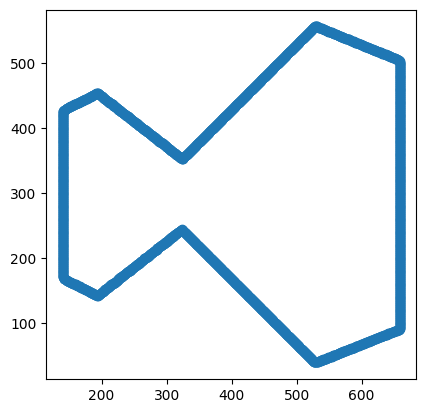

In [37]:
# plot the contour points
plt.plot(test_cont[:, 1], test_cont[:, 0], 'o')
plt.axis('image')
plt.show()

In [38]:
largest_countour_idx = 0
largest_countour_cnt = -1
for i, contour in enumerate(contours):
    n_points = contour.shape[0]
    if n_points < 20:
        continue

    if n_points > largest_countour_cnt:
        largest_countour_cnt = n_points
        largest_countour_idx = i
        print(f"New largest contour: {n_points}")

        y_vals = contour[:, 0]
        x_vals = contour[:, 1]

x_vals.shape, y_vals.shape

New largest contour: 2555


((2555,), (2555,))

In [39]:
t = np.arange(len(y_vals))
n = len(t)
n, t

(2555, array([   0,    1,    2, ..., 2552, 2553, 2554], shape=(2555,)))

In [40]:
max_n = 500

if n > max_n:
    y_vals = y_vals[::int(n/max_n)]
    x_vals = x_vals[::int(n/max_n)]
    n = len(x_vals)
    t = np.arange(n)
y_vals, y_vals, t

(array([568.5, 567.5, 564.5, 562. , 560. , 557.5, 554.5, 552. , 550. ,
        547.5, 544.5, 542. , 540. , 537. , 534.5, 532. , 530. , 527. ,
        524.5, 522. , 519.5, 517. , 514.5, 512.5, 509.5, 507. , 504.5,
        502.5, 499.5, 497. , 495. , 492.5, 489.5, 487. , 485. , 482.5,
        479.5, 477. , 475. , 472.5, 469.5, 467. , 465. , 462. , 459.5,
        457. , 455. , 452. , 449.5, 447. , 444.5, 442. , 439.5, 437.5,
        434.5, 432. , 429.5, 427.5, 424.5, 422. , 420. , 417.5, 414.5,
        412. , 410. , 407.5, 404.5, 402. , 400. , 397.5, 394.5, 392. ,
        390. , 387. , 384.5, 382. , 380. , 377. , 374.5, 372. , 369.5,
        367. , 367.5, 370. , 371.5, 374.5, 376.5, 378.5, 380.5, 383. ,
        385. , 387.5, 389.5, 391.5, 394. , 396.5, 398.5, 400.5, 403. ,
        405. , 407.5, 409.5, 411.5, 413.5, 415.5, 418. , 420.5, 422.5,
        424.5, 427. , 429. , 431. , 433.5, 435.5, 438. , 440. , 442. ,
        444.5, 446.5, 448.5, 451. , 453. , 455. , 457. , 459.5, 462. ,
      

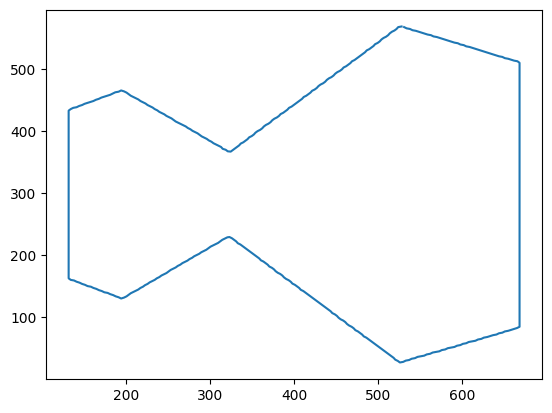

In [41]:
plt.plot(x_vals, y_vals)
plt.show()

In [42]:
poly_n = min(n - 1, 5)
coeffs_x = np.polyfit(t, x_vals, deg=poly_n)
coeffs_y = np.polyfit(t, y_vals, deg=poly_n)
n, t

(511,
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 17

In [43]:
t_for_plot = np.linspace(0, n-1, 300)
x_poly = np.polyval(coeffs_x, t_for_plot)
y_poly = np.polyval(coeffs_y, t_for_plot)
t_for_plot, x_poly, y_poly

(array([  0.        ,   1.70568562,   3.41137124,   5.11705686,
          6.82274247,   8.52842809,  10.23411371,  11.93979933,
         13.64548495,  15.35117057,  17.05685619,  18.76254181,
         20.46822742,  22.17391304,  23.87959866,  25.58528428,
         27.2909699 ,  28.99665552,  30.70234114,  32.40802676,
         34.11371237,  35.81939799,  37.52508361,  39.23076923,
         40.93645485,  42.64214047,  44.34782609,  46.05351171,
         47.75919732,  49.46488294,  51.17056856,  52.87625418,
         54.5819398 ,  56.28762542,  57.99331104,  59.69899666,
         61.40468227,  63.11036789,  64.81605351,  66.52173913,
         68.22742475,  69.93311037,  71.63879599,  73.34448161,
         75.05016722,  76.75585284,  78.46153846,  80.16722408,
         81.8729097 ,  83.57859532,  85.28428094,  86.98996656,
         88.69565217,  90.40133779,  92.10702341,  93.81270903,
         95.51839465,  97.22408027,  98.92976589, 100.63545151,
        102.34113712, 104.04682274, 105.

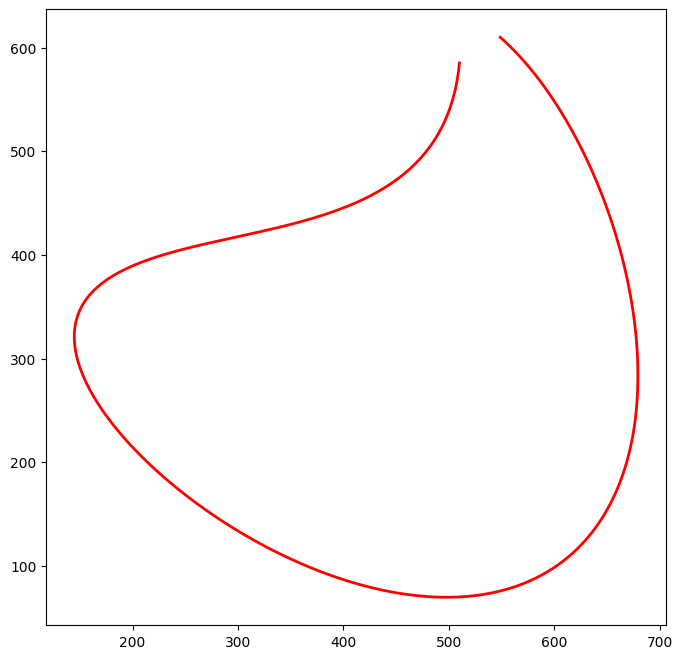

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_poly, y_poly, color="red", linewidth=2)

In [45]:
# pip install scipy
from scipy.interpolate import CubicSpline

In [46]:
sx = CubicSpline(t, x_vals, bc_type="natural")
sy = CubicSpline(t, y_vals, bc_type="natural")

In [47]:
t_for_plot = np.linspace(0, n-1, 5000)
x_poly = sx(t_for_plot)
y_poly = sy(t_for_plot)

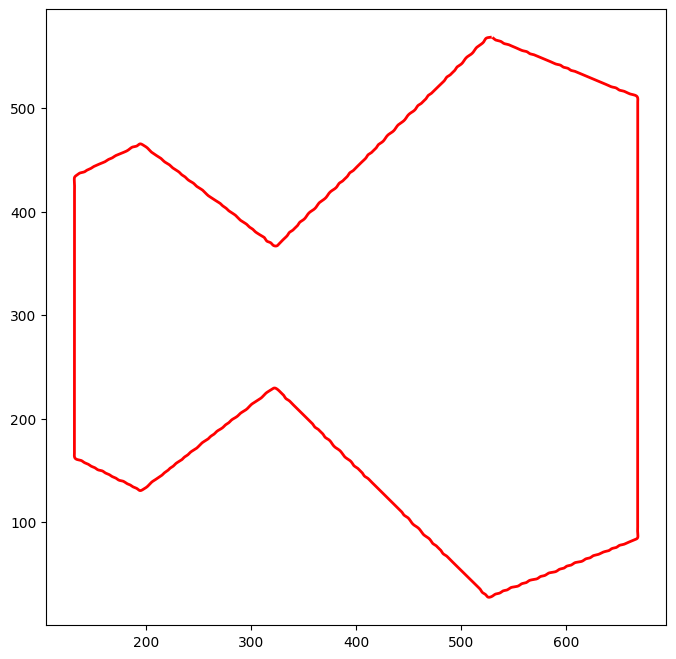

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_poly, y_poly, color="red", linewidth=2)